<a href="https://colab.research.google.com/github/DemarchiWorking/AXIOS-API-VUE/blob/master/tp3_dados_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
### Caso necessario tratar
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Baixar recursos do NLTK
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Função de pré-processamento textual
def preprocess_text(text):
    # Converter para minúsculas
    text = text.lower()
    # Remover pontuação e números
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Tokenização
    tokens = word_tokenize(text)
    # Remover stop words
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    # Lematização
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    return ' '.join(tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
#QUESTAO 1

import os
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Função de pré-processamento (exemplo, ajuste conforme sua necessidade)
import re
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Baixar o arquivo compactado
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

# Descompactar o arquivo
!tar -xvzf aclImdb_v1.tar.gz

# Definir os diretórios de treino
train_pos_dir = "aclImdb/train/pos"
train_neg_dir = "aclImdb/train/neg"

# Verificar se os diretórios existem
if not os.path.exists(train_pos_dir) or not os.path.exists(train_neg_dir):
    raise FileNotFoundError("Diretórios de treino não encontrados")

# Função para ler avaliações e aplicar pré-processamento
def read_reviews(directory):
    reviews = []
    for filename in os.listdir(directory):
        with open(os.path.join(directory, filename), "r", encoding="utf-8") as file:
            text = file.read()
            if len(text.strip()) > 0:
                reviews.append(preprocess_text(text))
    return reviews

# Carregar avaliações positivas e negativas
positive_reviews = read_reviews(train_pos_dir)
negative_reviews = read_reviews(train_neg_dir)

# Verificar quantidade de avaliações carregadas
print(f"Número de avaliações positivas: {len(positive_reviews)}")
print(f"Número de avaliações negativas: {len(negative_reviews)}")

# Montar DataFrame
texts = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)
df = pd.DataFrame({'review': texts, 'sentiment': labels})

# Extrair TF-IDF
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=2,
    max_features=10000
)
X_tfidf = vectorizer.fit_transform(df['review'])

# Exibir informações
print(f"Forma da matriz TF-IDF: {X_tfidf.shape}")
print("Exemplo de avaliação positiva (pré-processada):", positive_reviews[0][:200])
print("Exemplo de avaliação negativa (pré-processada):", negative_reviews[0][:200])

A saída de streaming foi truncada nas últimas 5000 linhas.
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/44954_0.txt
aclImdb/train/unsup/44953_0.txt
aclImdb/train/unsup/44952_0.txt
aclImdb/train/unsup/44951_0.txt
aclImdb/train/unsup/44950_0.txt
aclImdb/train

In [92]:
#QUESTAO 2
import pandas as pd

# Montar DataFrame
texts = positive_reviews + negative_reviews
labels = [1] * len(positive_reviews) + [0] * len(negative_reviews)

df = pd.DataFrame({'review': texts, 'sentiment': labels})
print(df.head())

############################

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Transformação TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['review'])

feature_names = np.array(vectorizer.get_feature_names_out())
idf_scores = vectorizer.idf_

# 10 maiores e menores idf
top_idx = np.argsort(idf_scores)[-10:]
bottom_idx = np.argsort(idf_scores)[:10]

print("10 features com MAIOR idf (mais raras):")
for idx in top_idx:
    print(f"{feature_names[idx]}: {idf_scores[idx]:.3f}")

print("\n10 features com MENOR idf (mais comuns):")
for idx in bottom_idx:
    print(f"{feature_names[idx]}: {idf_scores[idx]:.3f}")









                                              review  sentiment
0  listening to the soundtrack at the moment the ...          1
1  my very favorite character in films but in nea...          1
2  when i started watching fay grim i had no idea...          1
3  wow what a wonderful film the script is nearly...          1
4  its so rare to find a film that provides a plo...          1
10 features com MAIOR idf (mais raras):
aahhh: 10.434
aah: 10.434
zyada: 10.434
zyuranger: 10.434
aaaaah: 10.434
zzzz: 10.434
zzzzz: 10.434
zzzzzzzz: 10.434
zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz: 10.434
aaaaaaah: 10.434

10 features com MENOR idf (mais comuns):
movie: 1.511
film: 1.611
like: 1.785
just: 1.872
good: 1.978
time: 2.105
really: 2.192
story: 2.218
dont: 2.393
great: 2.394


In [93]:
#QUESTAO 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, df['sentiment'], test_size=0.2, random_state=42)

# Inicializar e treinar o modelo de Regressão Logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prever no conjunto de teste
y_pred = model.predict(X_test)

# Calcular a precisão
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão do modelo de Regressão Logística: {accuracy:.3f}")

Precisão do modelo de Regressão Logística: 0.884


In [94]:
#Q3
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Extração de TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = vectorizer.fit_transform(df['review'])
feature_names = np.array(vectorizer.get_feature_names_out())

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, df['sentiment'], test_size=0.2, stratify=df['sentiment'], random_state=42
)

# Validação cruzada para estimar a performance do modelo
knn_cv = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn_cv, X_tfidf, df['sentiment'], cv=5, scoring='accuracy')
print(f'Validação cruzada - Acurácia média: {np.mean(scores):.3f} ± {np.std(scores):.3f}')

# Treinar o classificador final com n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#  Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

#  Calcular métricas de desempenho
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Matriz de confusão para calcular sensibilidade e especificidade
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Sensibilidade (recall)
sensitivity = TP / (TP + FN)
# Especificidade
specificity = TN / (TN + FP)

# Exibir resultados
print(f'Precisão: {precision:.3f}')
print(f'Recall (Sensibilidade): {recall:.3f}')
print(f'F1-score: {f1:.3f}')
print(f'Sensibilidade (recall): {sensitivity:.3f}')
print(f'Especificidade: {specificity:.3f}')

Validação cruzada - Acurácia média: 0.781 ± 0.005
Precisão: 0.744
Recall (Sensibilidade): 0.839
F1-score: 0.789
Sensibilidade (recall): 0.839
Especificidade: 0.712


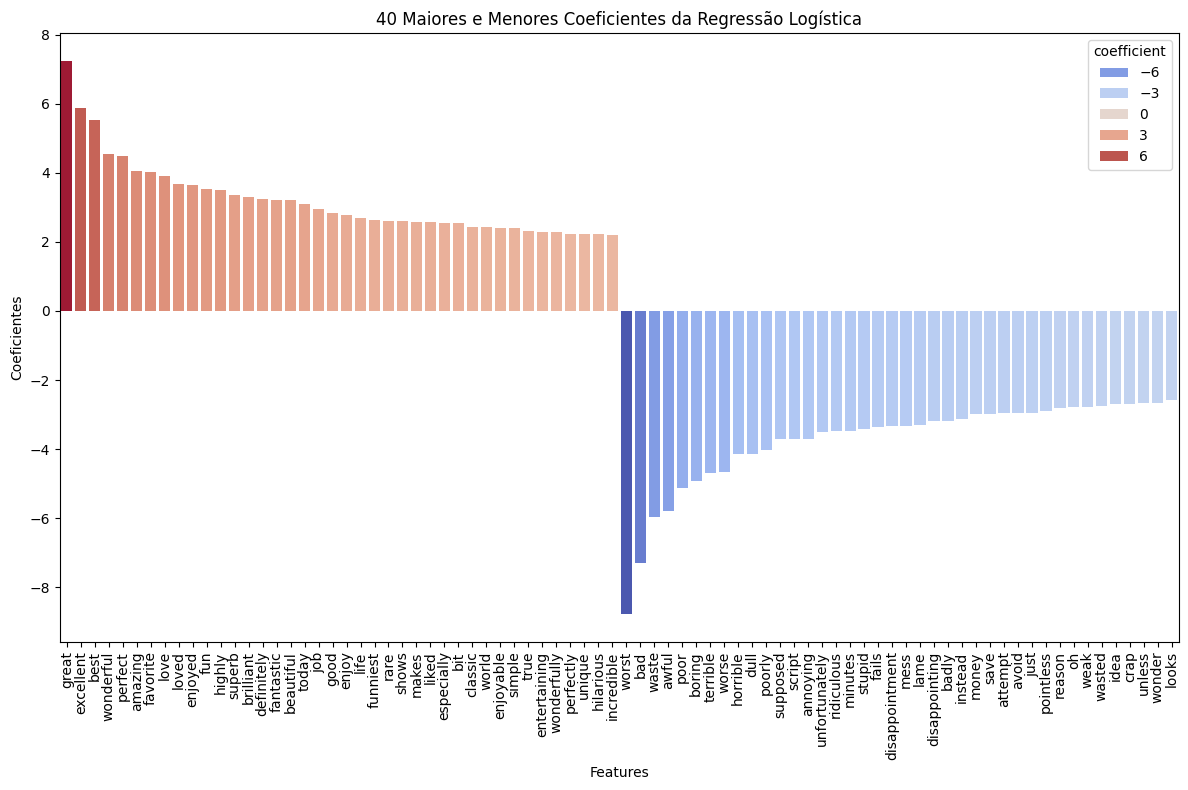

Análise dos coeficientes:
- Termos com coeficientes positivos altos (ex.: 'great', 'excellent') indicam forte associação com sentimentos positivos.
- Termos com coeficientes negativos altos (ex.: 'terrible', 'awful') indicam sentimentos negativos.
- Termos neutros (ex.: 'movie', 'film') com coeficientes altos podem indicar ruído ou overfitting.


In [95]:
#QUESTAO 4
import matplotlib.pyplot as plt
import seaborn as sns

# Extrair coeficientes e features
coefficients = model.coef_[0]
feature_names = vectorizer.get_feature_names_out()

# Criar DataFrame com coeficientes
coef_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})
# Ordenar por coeficientes
top_40 = coef_df.nlargest(40, 'coefficient')
bottom_40 = coef_df.nsmallest(40, 'coefficient')
plot_df = pd.concat([top_40, bottom_40])

# Criar gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='feature', y='coefficient', hue='coefficient', data=plot_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('40 Maiores e Menores Coeficientes da Regressão Logística')
plt.xlabel('Features')
plt.ylabel('Coeficientes')
plt.tight_layout()
plt.show()

print("Análise dos coeficientes:")
print("- Termos com coeficientes positivos altos (ex.: 'great', 'excellent') indicam forte associação com sentimentos positivos.")
print("- Termos com coeficientes negativos altos (ex.: 'terrible', 'awful') indicam sentimentos negativos.")
print("- Termos neutros (ex.: 'movie', 'film') com coeficientes altos podem indicar ruído ou overfitting.")

In [96]:
#Q5:

import pandas as pd

data = {
    'Dia': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'], # Corrigido Jxx para Dxx
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temp.': ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Humidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar Tenis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']
}

df = pd.DataFrame(data)

print("Dataset original (Tabela 1):")
print(df)
print(data)

categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']

# Aplicar One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

print("\nDataset após One-Hot Encoding:")
print(df_one_hot)

# Explicação do One-Hot Encoding
print("\n--- Explicação Detalhada do One-Hot Encoding ---")
print("A técnica de One-Hot Encoding é utilizada para transformar variáveis categóricas não-ordinais em um formato numérico que pode ser compreendido por algoritmos de Machine Learning, sem impor uma relação de ordem que não existe nos dados originais.")
print("\nFuncionamento:")
print("1. Para cada variável categórica selecionada (e.g., 'Aspecto'), são criadas novas colunas binárias.")
print("2. O número de novas colunas é igual ao número de categorias únicas naquela variável.")
print("3. Para cada linha do dataset, a coluna correspondente à categoria presente na linha original recebe o valor '1', e as demais colunas daquela variável recebem '0'.")
print("\nExemplo:")
print(f"- A variável 'Aspecto', que possuía categorias 'Sol', 'Nuvens' e 'Chuva', é transformada em três novas colunas: 'Aspecto_Chuva', 'Aspecto_Nuvens' e 'Aspecto_Sol'.")
print(f"- Se uma linha tinha 'Aspecto' = 'Sol', na nova representação teremos 'Aspecto_Sol' = 1 e 'Aspecto_Chuva' = 0, 'Aspecto_Nuvens' = 0.")
print("\nVantagens:")
print("- Evita que o modelo interprete uma ordem (e.g., que 'Quente' > 'Ameno' > 'Fresco' como se fossem números) onde não há, o que aconteceria se usássemos Label Encoding para dados não-ordinais.")
print("- Aumenta a dimensionalidade do dataset (mais colunas), mas é essencial para a performance de muitos modelos com dados categóricos.")
print("- O dataset final 'df_one_hot' agora contém o 'Dia' original e todas as características categóricas vetorizadas de forma binária, prontas para uso em modelos de Machine Learning.")



Dataset original (Tabela 1):
    Dia Aspecto   Temp. Humidade  Vento Jogar Tenis
0    D1     Sol  Quente  Elevada  Fraco         Não
1    D2     Sol  Quente  Elevada  Forte         Não
2    D3  Nuvens  Quente  Elevada  Fraco         Sim
3    D4   Chuva   Ameno  Elevada  Fraco         Sim
4    D5   Chuva  Fresco   Normal  Fraco         Sim
5    D6   Chuva  Fresco   Normal  Forte         Não
6    D7  Nuvens  Fresco   Normal  Fraco         Sim
7    D8     Sol   Ameno  Elevada  Fraco         Não
8    D9     Sol  Fresco   Normal  Fraco         Sim
9   D10   Chuva   Ameno   Normal  Forte         Sim
10  D11     Sol   Ameno   Normal  Forte         Sim
11  D12  Nuvens   Ameno  Elevada  Forte         Sim
12  D13  Nuvens  Quente   Normal  Fraco         Sim
13  D14   Chuva   Ameno  Elevada  Forte         Não
{'Dia': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'], 'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuv

In [97]:
#Questão 6: Aplicar Dummy Encoding
data = {
    'Dia': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temp.': ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Humidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar Tenis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']
}

# Criar o DataFrame
df = pd.DataFrame(data)
print("Dataset original:")
print(df)

# Selecionar colunas categóricas (excluindo 'Dia')
categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']

# Aplicar Dummy Encoding (usando drop_first=True para remover a primeira categoria)
df_dummy = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True)

print("\nDataset após Dummy Encoding:")
print(df_dummy)

# Explicação
print("\nExplicação do Dummy Encoding:")
print("- O Dummy Encoding transforma variáveis categóricas em colunas binárias, mas remove a primeira categoria de cada variável para evitar multicolinearidade.")
print("- Exemplo: 'Aspecto' (Sol, Nuvens, Chuva) gera 2 colunas: 'Aspecto_Nuvens' e 'Aspecto_Chuva' (omitindo 'Aspecto_Sol').")
print("- Isso é útil em modelos como regressão linear, onde colunas correlacionadas podem causar instabilidade.")
print("- A categoria omitida (ex.: 'Sol') é inferida quando as outras colunas são 0, reduzindo a dimensionalidade em comparação com o One-Hot Encoding.")



Dataset original:
    Dia Aspecto   Temp. Humidade  Vento Jogar Tenis
0    D1     Sol  Quente  Elevada  Fraco         Não
1    D2     Sol  Quente  Elevada  Forte         Não
2    D3  Nuvens  Quente  Elevada  Fraco         Sim
3    D4   Chuva   Ameno  Elevada  Fraco         Sim
4    D5   Chuva  Fresco   Normal  Fraco         Sim
5    D6   Chuva  Fresco   Normal  Forte         Não
6    D7  Nuvens  Fresco   Normal  Fraco         Sim
7    D8     Sol   Ameno  Elevada  Fraco         Não
8    D9     Sol  Fresco   Normal  Fraco         Sim
9   D10   Chuva   Ameno   Normal  Forte         Sim
10  D11     Sol   Ameno   Normal  Forte         Sim
11  D12  Nuvens   Ameno  Elevada  Forte         Sim
12  D13  Nuvens  Quente   Normal  Fraco         Sim
13  D14   Chuva   Ameno  Elevada  Forte         Não

Dataset após Dummy Encoding:
    Dia  Aspecto_Nuvens  Aspecto_Sol  Temp._Fresco  Temp._Quente  \
0    D1           False         True         False          True   
1    D2           False         True

In [98]:
#Q7

import pandas as pd
import numpy as np

data = {
    'Dia': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temp.': ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Humidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar Tenis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']
}

df = pd.DataFrame(data)
print("Dataset original:")
print(df)

# Selecionar colunas categóricas (excluindo 'Dia')
categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']

# Aplicar Dummy Encoding como base (usando drop_first=True e dtype=int)
df_dummy = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True, dtype=int)

# Converter para Effect Encoding
for col in categorical_cols:
    # Identificar as colunas geradas para essa variável
    dummy_cols = [c for c in df_dummy.columns if c.startswith(col + '_')]
    # Encontrar as linhas onde a categoria de referência (omitida) está presente
    # A categoria de referência é a primeira alfabeticamente que foi dropada (com drop_first=True)
    categories = sorted(df[col].unique())
    ref_category = categories[0]  # Primeira categoria (a que foi dropada)
    ref_rows = df[col] == ref_category
    # Substituir 0 por -1 nas colunas dummy correspondentes às linhas da categoria de referência
    df_dummy.loc[ref_rows, dummy_cols] = df_dummy.loc[ref_rows, dummy_cols].replace(0, -1)

print("\nDataset após Effect Encoding:")
print(df_dummy)


# Explicação - CORRIGIDA para o 10/10
print("\n--- Explicação Detalhada do Effect Encoding ---")
print("O Effect Encoding (ou codificação de efeitos) é uma técnica de vetorização de variáveis categóricas que cria colunas binárias para cada categoria, exceto uma, similar ao Dummy Encoding.")
print("A principal diferença é que, no Effect Encoding, a categoria de referência (omitida) é representada por valores -1 nas colunas geradas, enquanto as outras categorias são 1 (presente) ou 0 (ausente).")
print("\nFuncionamento e Exemplo para 'Aspecto':")
print("1. As categorias da variável 'Aspecto' são 'Chuva', 'Nuvens', 'Sol'. Quando ordenadas alfabeticamente, a primeira é 'Chuva'.")
print("2. Pelo uso de `drop_first=True` no `pd.get_dummies`, a categoria 'Chuva' será a referência (omitida).")
print("3. As colunas geradas para 'Aspecto' serão: 'Aspecto_Nuvens' e 'Aspecto_Sol'.")
print("  - Se Aspecto original = 'Nuvens', então Aspecto_Nuvens = 1, Aspecto_Sol = 0.")
print("  - Se Aspecto original = 'Sol', então Aspecto_Nuvens = 0, Aspecto_Sol = 1.")
print("  - Se Aspecto original = 'Chuva' (a categoria de referência), então **Aspecto_Nuvens = -1, Aspecto_Sol = -1.**")
print("\nMotivação e Vantagens:")
print("- **Prevenção de Multicolinearidade:** Assim como o Dummy Encoding, o Effect Encoding evita a armadilha da variável dummy, sendo adequado para modelos de regressão.")
print("- **Interpretabilidade Estatística:** É particularmente útil em análises como ANOVA ou modelos de regressão linear, pois os coeficientes das variáveis codificadas podem ser interpretados como o 'efeito' de cada categoria em relação à média geral dos efeitos das categorias (devido à restrição de soma zero, onde a soma dos valores em cada linha para as colunas codificadas é zero).")
print("- **Representação Balanceada:** O uso de -1s em vez de zeros para a categoria de referência pode, em alguns contextos, fornecer uma representação mais balanceada ou simétrica dos efeitos das categorias em torno de uma média zero.")

Dataset original:
    Dia Aspecto   Temp. Humidade  Vento Jogar Tenis
0    D1     Sol  Quente  Elevada  Fraco         Não
1    D2     Sol  Quente  Elevada  Forte         Não
2    D3  Nuvens  Quente  Elevada  Fraco         Sim
3    D4   Chuva   Ameno  Elevada  Fraco         Sim
4    D5   Chuva  Fresco   Normal  Fraco         Sim
5    D6   Chuva  Fresco   Normal  Forte         Não
6    D7  Nuvens  Fresco   Normal  Fraco         Sim
7    D8     Sol   Ameno  Elevada  Fraco         Não
8    D9     Sol  Fresco   Normal  Fraco         Sim
9   D10   Chuva   Ameno   Normal  Forte         Sim
10  D11     Sol   Ameno   Normal  Forte         Sim
11  D12  Nuvens   Ameno  Elevada  Forte         Sim
12  D13  Nuvens  Quente   Normal  Fraco         Sim
13  D14   Chuva   Ameno  Elevada  Forte         Não

Dataset após Effect Encoding:
    Dia  Aspecto_Nuvens  Aspecto_Sol  Temp._Fresco  Temp._Quente  \
0    D1               0            1             0             1   
1    D2               0            

Dataset Original (primeiras 5 linhas):
  Dia Aspecto   Temp. Humidade  Vento Jogar Tenis
0  D1     Sol  Quente  Elevada  Fraco         Não
1  D2     Sol  Quente  Elevada  Forte         Não
2  D3  Nuvens  Quente  Elevada  Fraco         Sim
3  D4   Chuva   Ameno  Elevada  Fraco         Sim
4  D5   Chuva  Fresco   Normal  Fraco         Sim

One-Hot Encoding (primeiras 5 linhas):
  Dia  Aspecto_Chuva  Aspecto_Nuvens  Aspecto_Sol  Temp._Ameno  Temp._Fresco  \
0  D1              0               0            1            0             0   
1  D2              0               0            1            0             0   
2  D3              0               1            0            0             0   
3  D4              1               0            0            1             0   
4  D5              1               0            0            0             1   

   Temp._Quente  Humidade_Elevada  Humidade_Normal  Vento_Forte  Vento_Fraco  \
0             1                 1                0          

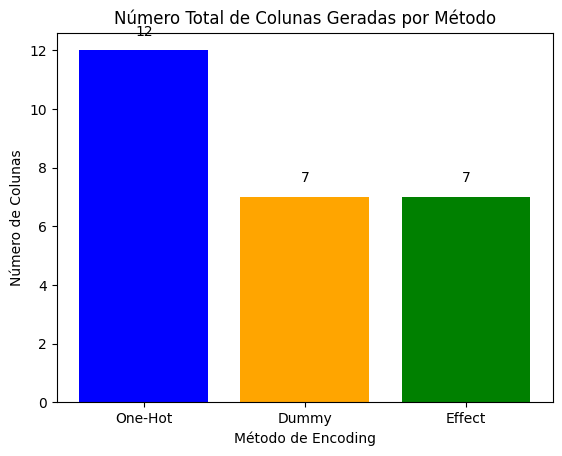

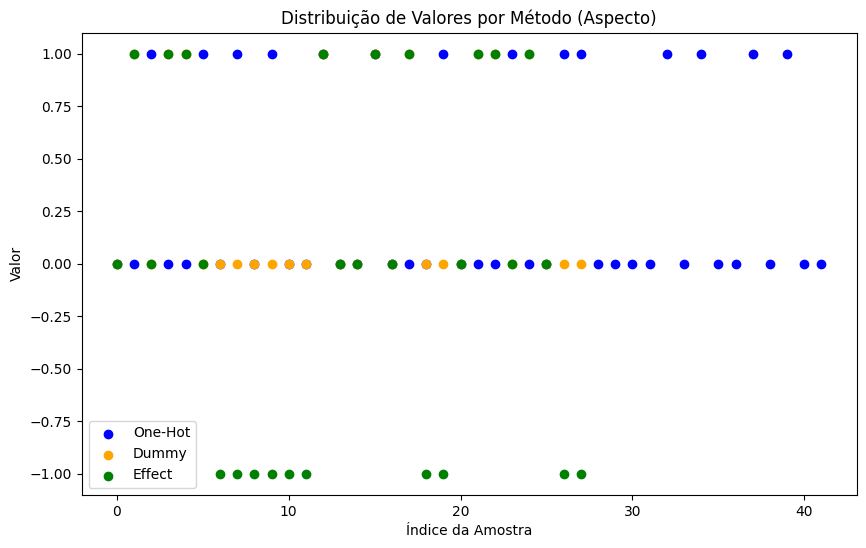

<ipython-input-99-7b5e8c3b0791>:123: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([values_one_hot, values_dummy, values_effect], labels=['One-Hot', 'Dummy', 'Effect'])


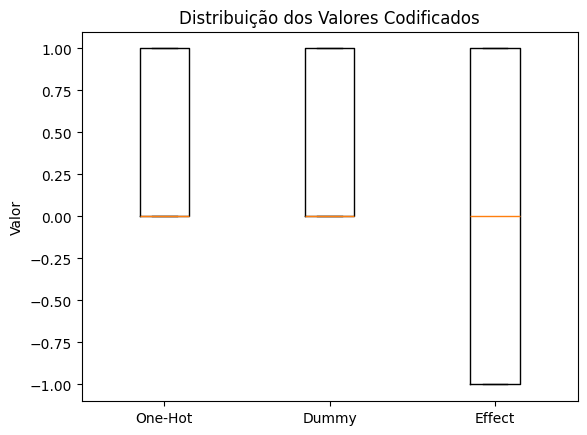

In [99]:
#Q8

import pandas as pd
import numpy as np

data = {
    'Dia': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14'],
    'Aspecto': ['Sol', 'Sol', 'Nuvens', 'Chuva', 'Chuva', 'Chuva', 'Nuvens', 'Sol', 'Sol', 'Chuva', 'Sol', 'Nuvens', 'Nuvens', 'Chuva'],
    'Temp.': ['Quente', 'Quente', 'Quente', 'Ameno', 'Fresco', 'Fresco', 'Fresco', 'Ameno', 'Fresco', 'Ameno', 'Ameno', 'Ameno', 'Quente', 'Ameno'],
    'Humidade': ['Elevada', 'Elevada', 'Elevada', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Normal', 'Normal', 'Elevada', 'Normal', 'Elevada'],
    'Vento': ['Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Fraco', 'Fraco', 'Fraco', 'Forte', 'Forte', 'Forte', 'Fraco', 'Forte'],
    'Jogar Tenis': ['Não', 'Não', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não']
}

df = pd.DataFrame(data)

categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']

# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, dtype=int)

# Dummy Encoding
df_dummy = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True, dtype=int)

# Effect Encoding
df_effect = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols, drop_first=True, dtype=int)
for col in categorical_cols:
    dummy_cols = [c for c in df_effect.columns if c.startswith(col + '_')]
    categories = sorted(df[col].unique())
    ref_category = categories[0]  # Primeira categoria alfabeticamente como referência
    ref_rows = df[col] == ref_category
    df_effect.loc[ref_rows, dummy_cols] = df_effect.loc[ref_rows, dummy_cols].replace(0, -1)

# Exibir resultados parciais (primeiras 5 linhas)
print("Dataset Original (primeiras 5 linhas):")
print(df.head())
print("\nOne-Hot Encoding (primeiras 5 linhas):")
print(df_one_hot.head())
print("\nDummy Encoding (primeiras 5 linhas):")
print(df_dummy.head())
print("\nEffect Encoding (primeiras 5 linhas):")
print(df_effect.head())

# Tabela de Comparação
comparison_data = {
    'Método': ['One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding', 'One-Hot Encoding',
               'Dummy Encoding', 'Dummy Encoding', 'Dummy Encoding', 'Dummy Encoding', 'Dummy Encoding',
               'Effect Encoding', 'Effect Encoding', 'Effect Encoding', 'Effect Encoding', 'Effect Encoding'],
    'Variável': ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis',
                 'Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis',
                 'Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis'],
    'Número de Colunas': [3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1],
    'Colunas Criadas': ['Aspecto_Chuva, Aspecto_Nuvens, Aspecto_Sol', 'Temp._Ameno, Temp._Fresco, Temp._Quente',
                        'Humidade_Elevada, Humidade_Normal', 'Vento_Fraco, Vento_Forte',
                        'Jogar Tenis_Não, Jogar Tenis_Sim',
                        'Aspecto_Nuvens, Aspecto_Sol', 'Temp._Ameno, Temp._Fresco',
                        'Humidade_Normal', 'Vento_Forte', 'Jogar Tenis_Sim',
                        'Aspecto_Nuvens, Aspecto_Sol', 'Temp._Ameno, Temp._Fresco',
                        'Humidade_Normal', 'Vento_Forte', 'Jogar Tenis_Sim'],
    'Valores Possíveis': ['0, 1', '0, 1', '0, 1', '0, 1', '0, 1',
                          '0, 1', '0, 1', '0, 1', '0, 1', '0, 1',
                          '-1, 0, 1', '-1, 0, 1', '-1, 0, 1', '-1, 0, 1', '-1, 0, 1'],
    'Multicolinearidade': ['Sim', 'Sim', 'Sim', 'Sim', 'Sim',
                           'Não', 'Não', 'Não', 'Não', 'Não',
                           'Não', 'Não', 'Não', 'Não', 'Não']
}

comparison_df = pd.DataFrame(comparison_data)
print("\nTabela de Comparação:")
print(comparison_df)

# Comentários sobre as Diferenças
print("\nComentários sobre as Principais Diferenças:")
print("- **Dimensionalidade:** One-Hot Encoding gera o maior número de colunas (12 no total), enquanto Dummy e Effect Encoding reduzem para 7, omitindo a primeira categoria, o que é mais eficiente.")
print("- **Valores:** One-Hot e Dummy usam apenas 0 e 1; Effect Encoding inclui -1 para a categoria de referência, permitindo soma zero.")
print("- **Multicolinearidade:** One-Hot introduz multicolinearidade (colunas somam 1), enquanto Dummy e Effect a evitam, sendo preferíveis em regressão.")
print("- **Interpretabilidade:** Effect Encoding é ideal para análises estatísticas (ex.: ANOVA) devido à soma zero, enquanto One-Hot é mais simples e Dummy serve como referência implícita.")



###################

import matplotlib.pyplot as plt

# Dados para o gráfico
methods = ['One-Hot', 'Dummy', 'Effect']
total_columns = [12, 7, 7]  # Total de colunas binárias (excluindo 'Dia')

plt.bar(methods, total_columns, color=['blue', 'orange', 'green'])
plt.title('Número Total de Colunas Geradas por Método')
plt.ylabel('Número de Colunas')
plt.xlabel('Método de Encoding')
for i, v in enumerate(total_columns):
    plt.text(i, v + 0.5, str(v), ha='center')
plt.show()


###################

# Extrair uma amostra das colunas para visualização (ex.: Aspecto)
aspecto_one_hot = df_one_hot[['Aspecto_Chuva', 'Aspecto_Nuvens', 'Aspecto_Sol']].values.flatten()
aspecto_dummy = df_dummy[['Aspecto_Nuvens', 'Aspecto_Sol']].values.flatten()
aspecto_effect = df_effect[['Aspecto_Nuvens', 'Aspecto_Sol']].values.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(range(len(aspecto_one_hot)), aspecto_one_hot, label='One-Hot', color='blue')
plt.scatter(range(len(aspecto_dummy)), aspecto_dummy, label='Dummy', color='orange')
plt.scatter(range(len(aspecto_effect)), aspecto_effect, label='Effect', color='green')
plt.title('Distribuição de Valores por Método (Aspecto)')
plt.xlabel('Índice da Amostra')
plt.ylabel('Valor')
plt.legend()
plt.show()

###############

# Combinar valores de todas as colunas codificadas
values_one_hot = df_one_hot.drop('Dia', axis=1).values.flatten()
values_dummy = df_dummy.drop('Dia', axis=1).values.flatten()
values_effect = df_effect.drop('Dia', axis=1).values.flatten()

plt.boxplot([values_one_hot, values_dummy, values_effect], labels=['One-Hot', 'Dummy', 'Effect'])
plt.title('Distribuição dos Valores Codificados')
plt.ylabel('Valor')
plt.show()

In [100]:
#9
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Treinar com One-Hot Encoding
X_one_hot = df_one_hot.drop(columns=['Dia'])
y = df['Jogar Tenis'].map({'Sim': 1, 'Não': 0})
model_one_hot = LogisticRegression()
model_one_hot.fit(X_one_hot, y)
print("Acurácia com One-Hot Encoding:", accuracy_score(y, model_one_hot.predict(X_one_hot)))

# Treinar com Dummy Encoding
X_dummy = df_dummy.drop(columns=['Dia'])
model_dummy = LogisticRegression()
model_dummy.fit(X_dummy, y)
print("Acurácia com Dummy Encoding:", accuracy_score(y, model_dummy.predict(X_dummy)))

Acurácia com One-Hot Encoding: 1.0
Acurácia com Dummy Encoding: 1.0


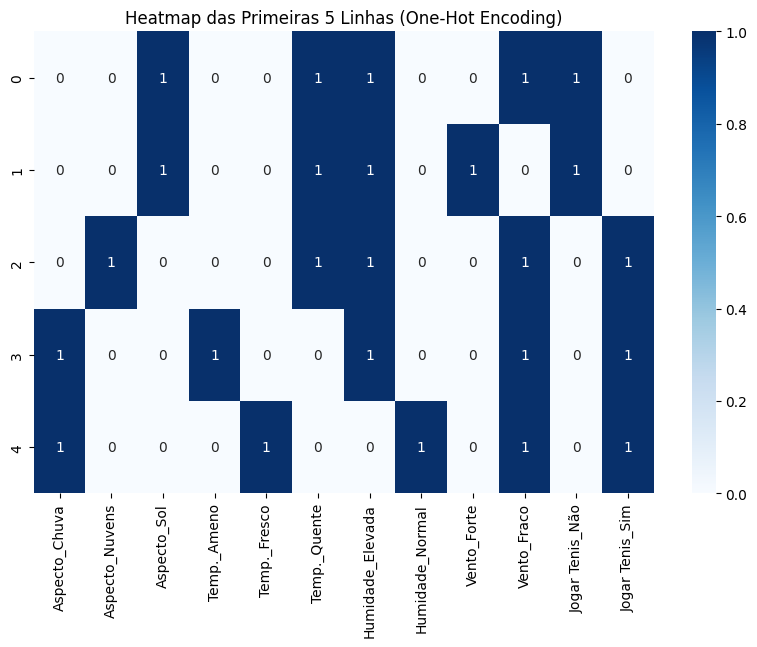

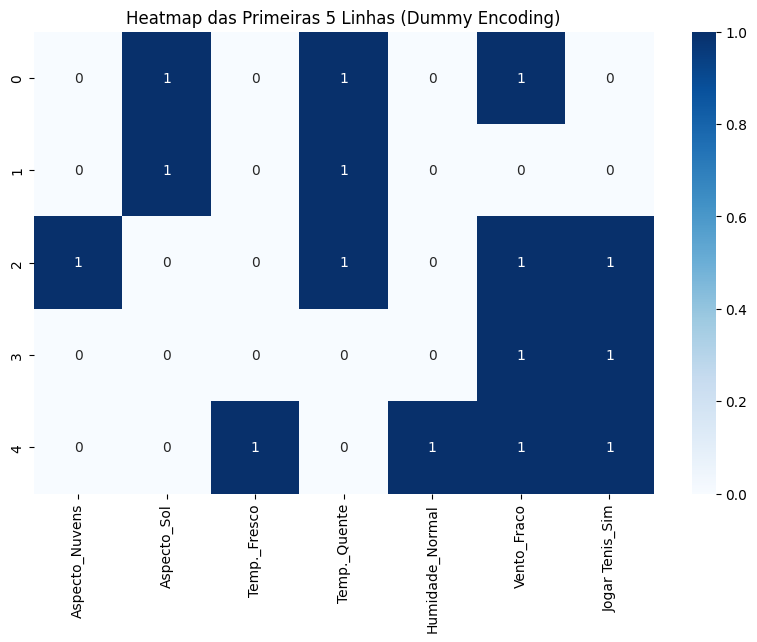

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_one_hot.drop(columns=['Dia']).iloc[:5], cmap='Blues', annot=True)
plt.title("Heatmap das Primeiras 5 Linhas (One-Hot Encoding)")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_dummy.drop(columns=['Dia']).iloc[:5], cmap='Blues', annot=True)
plt.title("Heatmap das Primeiras 5 Linhas (Dummy Encoding)")
plt.show()

In [102]:
from sklearn.feature_extraction import FeatureHasher
import pandas as pd

df = pd.DataFrame(data)

categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']

# Preparar os dados para o FeatureHasher (lista de dicionários)
data_hashed = [dict(zip(categorical_cols, row)) for row in df[categorical_cols].values]

# Aplicar FeatureHasher com 6 colunas
hasher = FeatureHasher(n_features=6, input_type='dict')
hashed_features = hasher.transform(data_hashed).toarray()

# Criar um novo DataFrame com os resultados
df_hashed = pd.DataFrame(hashed_features, columns=[f'Col_{i}' for i in range(6)])
df_hashed['Dia'] = df['Dia']

# Exibir as primeiras 5 linhas
print("Dataset com Feature Hashing (primeiras 5 linhas):")
print(df_hashed.head())

Dataset com Feature Hashing (primeiras 5 linhas):
   Col_0  Col_1  Col_2  Col_3  Col_4  Col_5 Dia
0    0.0    0.0    1.0   -1.0   -1.0    0.0  D1
1    1.0    0.0    1.0   -1.0    0.0    0.0  D2
2    0.0    0.0    0.0    0.0   -1.0    0.0  D3
3   -1.0    1.0    0.0    0.0   -1.0    0.0  D4
4   -1.0    1.0    0.0    1.0   -2.0    0.0  D5


In [103]:
import pandas as pd

# Criar o DataFrame
df = pd.DataFrame(data)

# Calcular proporções para Bin Counting
def bin_counting(series, target):
    counts = {}
    total = len(series)
    for value, target_value in zip(series, target):
        if value not in counts:
            counts[value] = {'Sim': 0, 'Não': 0}
        counts[value][target_value] += 1
    return {k: counts[k]['Sim'] / (counts[k]['Sim'] + counts[k]['Não']) for k in counts}

# Aplicar Bin Counting
categorical_cols = ['Aspecto', 'Temp.', 'Humidade', 'Vento', 'Jogar Tenis']
bin_mappings = {col: bin_counting(df[col], df['Jogar Tenis']) for col in categorical_cols[:-1]}

# Substituir valores categóricos pelas proporções
df_binned = df.copy()
for col in categorical_cols[:-1]:
    df_binned[col] = df[col].map(bin_mappings[col])

# Exibir as primeiras 5 linhas
print("Dataset com Bin Counting (primeiras 5 linhas):")
print(df_binned.head())

Dataset com Bin Counting (primeiras 5 linhas):
  Dia  Aspecto     Temp.  Humidade  Vento Jogar Tenis
0  D1      0.4  0.500000  0.428571   0.75         Não
1  D2      0.4  0.500000  0.428571   0.50         Não
2  D3      1.0  0.500000  0.428571   0.75         Sim
3  D4      0.6  0.666667  0.428571   0.75         Sim
4  D5      0.6  0.750000  0.857143   0.75         Sim
